# Henon map phase space

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sussix


#=========================
# Henon map
#=========================

def henon(x,px,n_turns):
    a = 0.4
    b = 0.7
    c = 1

    q_vec,p_vec = np.nan*np.ones(n_turns),np.nan*np.ones(n_turns)
    q_vec[0],p_vec[0] = x,px
    for ii in range(n_turns-1):
        _x,_px = q_vec[ii],p_vec[ii]
        q_vec[ii+1] =  _px
        p_vec[ii+1] =  -_x +a*_px + b*_px**2 + c*_px**3
    
    return q_vec,p_vec

#==========================

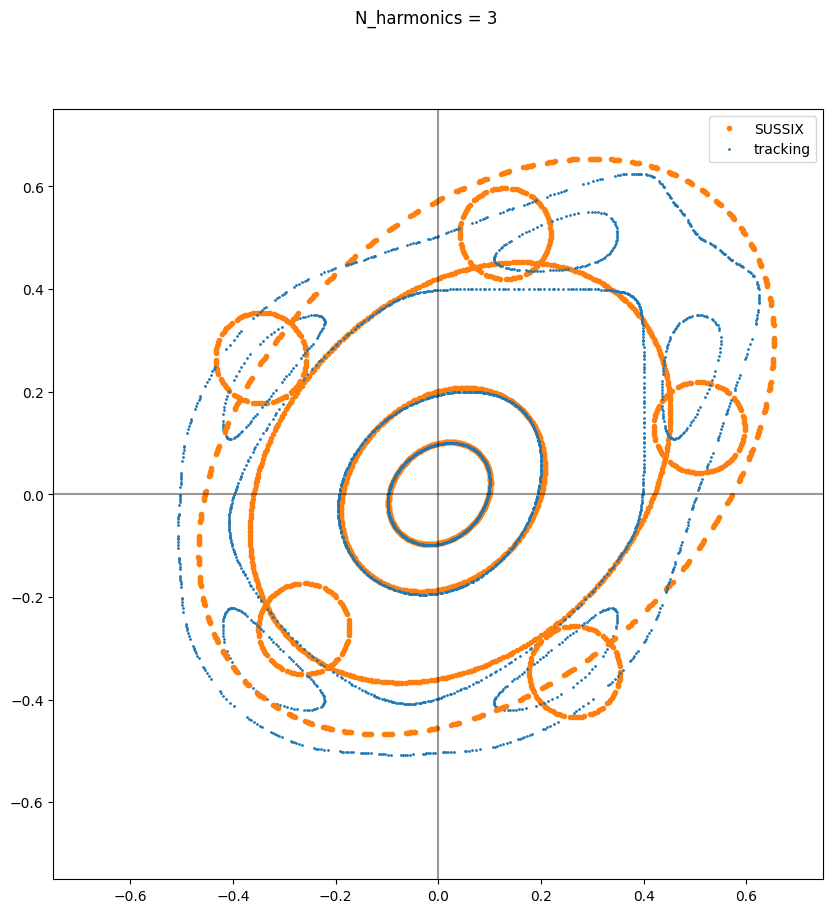

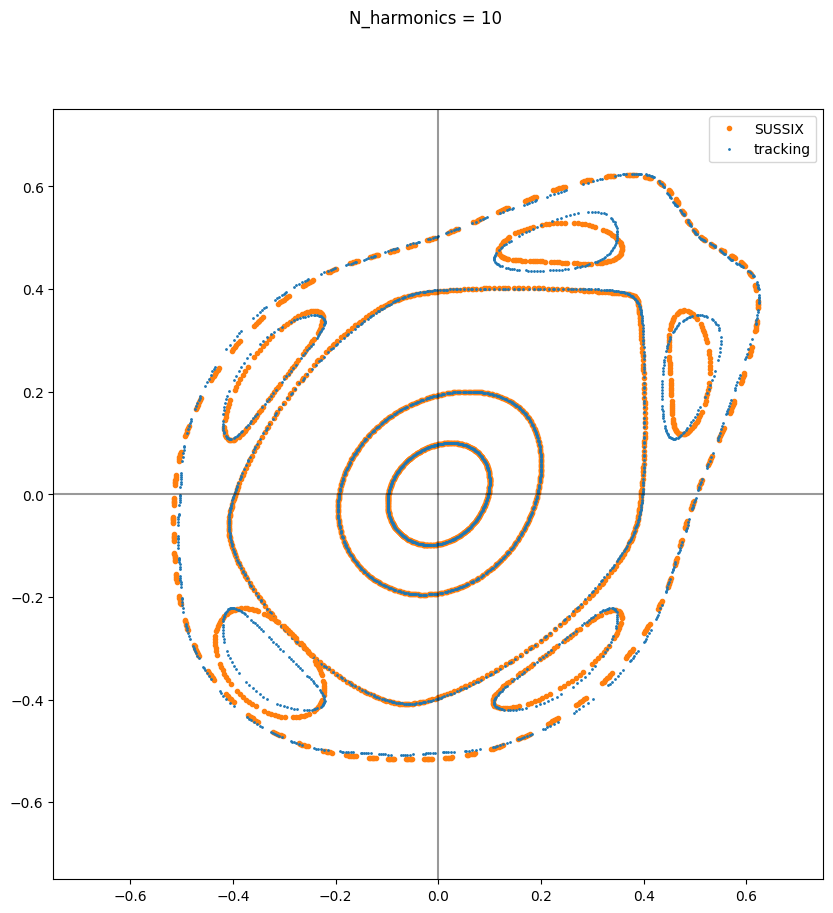

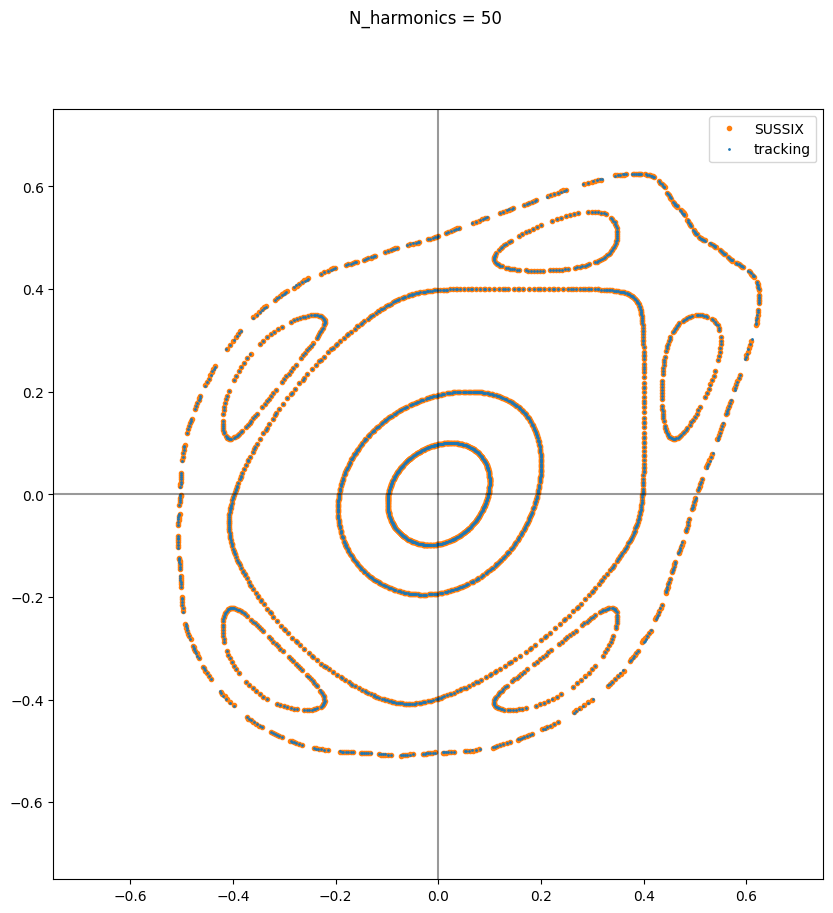

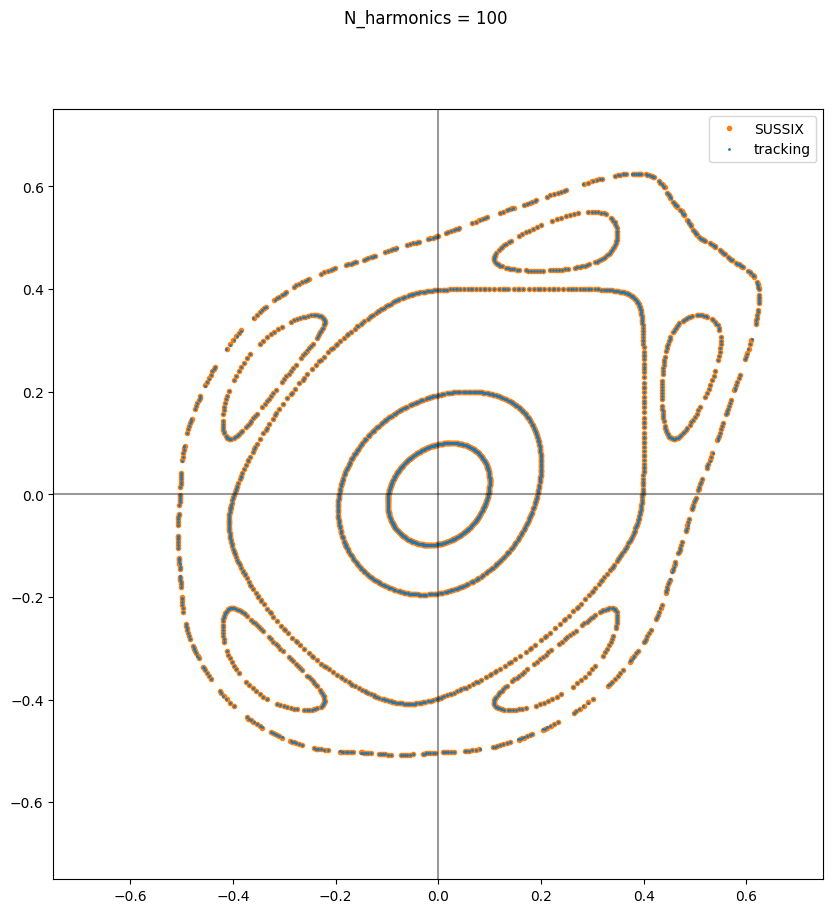

In [2]:
turns = int(1e5)
N     = np.arange(0,turns)
x_points = np.array([0.1,0.2,0.4,0.45,0.555])#np.linspace(0,1,30)
px_points = 0.25*x_points#0.25*np.linspace(0,1,30)

for n_harm in [3,10,50,100]:
    plt.figure(figsize=(10,10))
    plt.suptitle('N_harmonics = {}'.format(n_harm))
    for part_x,part_px in zip(x_points,px_points):
        x,px =  henon(part_x,part_px,turns)
        results = sussix.get_spectrum( x ,px, number_of_harmonics = n_harm,Hann_order=1)
        A,Q         = results.amplitude,results.frequency
        x_r,px_r    = sussix.analysis.generate_signal(  results.amplitude,
                                                        results.frequency,
                                                        N)


        show_turn = 500

        plt.plot(x_r[:show_turn],px_r[:show_turn],'.',color='C1')
        plt.plot(x[:show_turn],px[:show_turn],'.',color='C0',ms=2)


    plt.plot(np.nan,np.nan,'.',color='C1',label='SUSSIX')
    plt.plot(np.nan,np.nan,'.',color='C0',ms=2,label='tracking')

    plt.axhline(0,color='k',alpha=0.4)
    plt.axvline(0,color='k',alpha=0.4)
    plt.axis('square');
    plt.xlim([-0.75,0.75])
    plt.ylim([-0.75,0.75])
    plt.legend()